In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#from category_encoders import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [2]:
raw_data_tr = pd.read_csv('train.csv')
raw_data_te = pd.read_csv('test_bqCt9Pv.csv')

In [3]:
raw_data_tr.head(10)

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   
5    518279             54513       61900  89.66         67        22807   
6    529269             46349       61500  76.42         67        22807   
7    510278             43894       61900  71.89         67        22807   
8    490213             53713       61973  89.56         67        22807   
9    510980             52603       61300  86.95         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
0               45                1441      01-01-84        Salaried   
1               45                1502      31-07-85   Self employed   
2               45                1497      24-08-85   Self employed   
3               45                1501      30-12-93   Self employed   
4               45                1495      09-12-77   Self employed   
5               45                1501      08-09-90   Self employed   
6               45                1502      01-06-88        Salaried   
7               45                1501      04-10-89        Salaried   
8               45                1497      15-11-91   Self employed   
9               45                1492      01-06-68        Salaried   

       ...      SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  \
0      ...                          0                     0   
1      ...                          0                     0   
2      ...                          0                     0   
3      ...                          0                     0   
4      ...                          0                     0   
5      ...                          0                     0   
6      ...                          0                     0   
7      ...                          0                     0   
8      ...                          0                     0   
9      ...                          0                     0   

   PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   
5                1347               0                             0   
6                   0               0                             0   
7                   0               0                             0   
8                   0               0                             0   
9                2608               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   
2                                    0         0yrs 0mon   
3                                    0         0yrs 8mon   
4                                    0         0yrs 0mon   
5                                    0         1yrs 9mon   
6                                    0         0yrs 0mon   
7                                    0         0yrs 2mon   
8                                    0         4yrs 8mon   
9                                    0         1yrs 7mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  loan_default  
0              0yrs 0mon                0             0  
1             1yrs 11mon                0             1  
2              0yrs 0mon                0             0  
3   

In [4]:
raw_data_te.tail(10)

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
112382    669006             46849       72509  68.96         74        16646   
112383    708464             55243       75122  78.54         74        16646   
112384    762274             44109       68136  70.45         74        16646   
112385    767673             53303       72509  78.61         74        16646   
112386    743207             50683       68136  79.25         74        16646   
112387    755547             44875       72509  67.58         74        16646   
112388    716994             53549       72509  78.61         74        16646   
112389    709352             55243       72509  81.37         74        16646   
112390    699795             55243       72509  81.37         74        16646   
112391    755244             40274       72509  60.68         74        16646   

        manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
112382               86                2591      01-01-82   Self employed   
112383               86                2611      05-06-67   Self employed   
112384               86                2578      10-01-89   Self employed   
112385               86                2605      01-01-96   Self employed   
112386               86                2593      01-01-76   Self employed   
112387               86                2591      14-05-92   Self employed   
112388               86                2593      24-04-84   Self employed   
112389               86                2593      01-01-86   Self employed   
112390               86                2593      01-01-73   Self employed   
112391               86                2593      01-01-74   Self employed   

             ...        SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  \
112382       ...                          0                      0   
112383       ...                          0                      0   
112384       ...                          0                      0   
112385       ...                          0                      0   
112386       ...                          0                      0   
112387       ...                          0                      0   
112388       ...                          0                      0   
112389       ...                          0                      0   
112390       ...                          0                      0   
112391       ...                          0                      0   

        SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  \
112382                     0                   0               0   
112383                     0                   0               0   
112384                     0                   0               0   
112385                     0                   0               0   
112386                     0                8350               0   
112387                     0                   0               0   
112388                     0                   0               0   
112389                     0                   0               0   
112390                     0                   0               0   
112391                     0                   0               0   

        NEW.ACCTS.IN.LAST.SIX.MONTHS  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  \
112382                             0                                    0   
112383                             0                                    1   
112384                             0                                    0   
112385                             0                                    0   
112386                             0                                    0   
112387                             0                                    0   
112388                             0                                    0   
112389                             0                                    0   
112390                             1                   

In [5]:
project_data_tr = raw_data_tr
project_data_te = raw_data_te

In [6]:
project_data_tr.head(2)

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
0               45                1441      01-01-84        Salaried   
1               45                1502      31-07-85   Self employed   

       ...      SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  \
0      ...                          0                     0   
1      ...                          0                     0   

   PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                   0               0                             0   
1                1991               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  loan_default  
0              0yrs 0mon                0             0  
1             1yrs 11mon                0             1  

[2 rows x 41 columns]

In [7]:
project_data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

# EDA

In [8]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()


/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



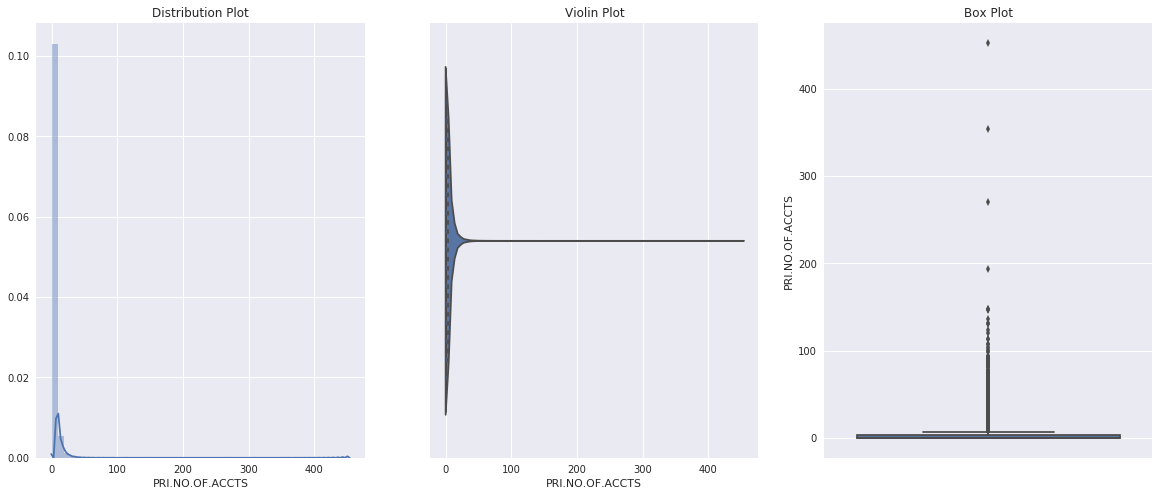

In [9]:
univariate(df=project_data_tr, col='PRI.NO.OF.ACCTS',vartype=0)

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



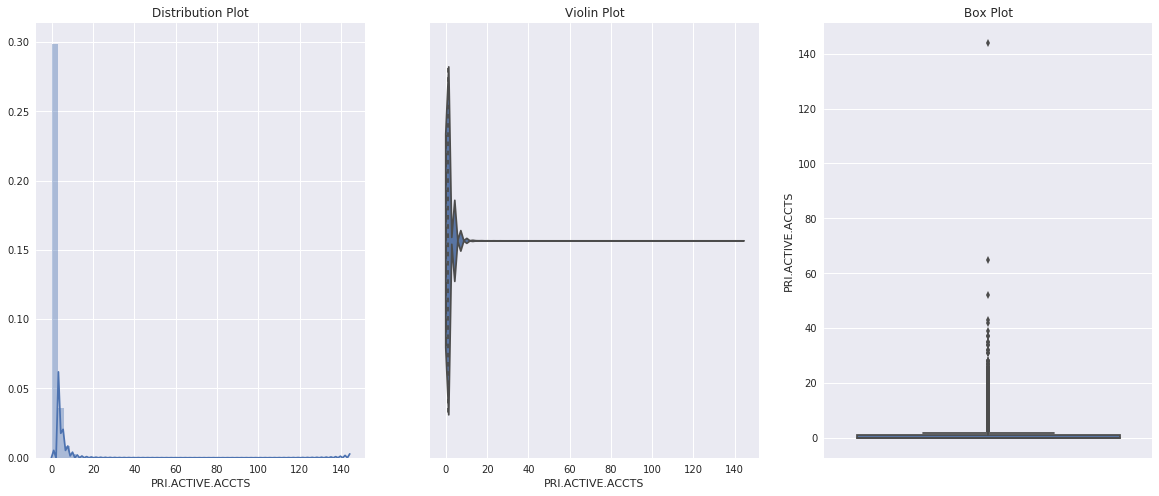

In [10]:
univariate(df=project_data_tr, col='PRI.ACTIVE.ACCTS',vartype=0)

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



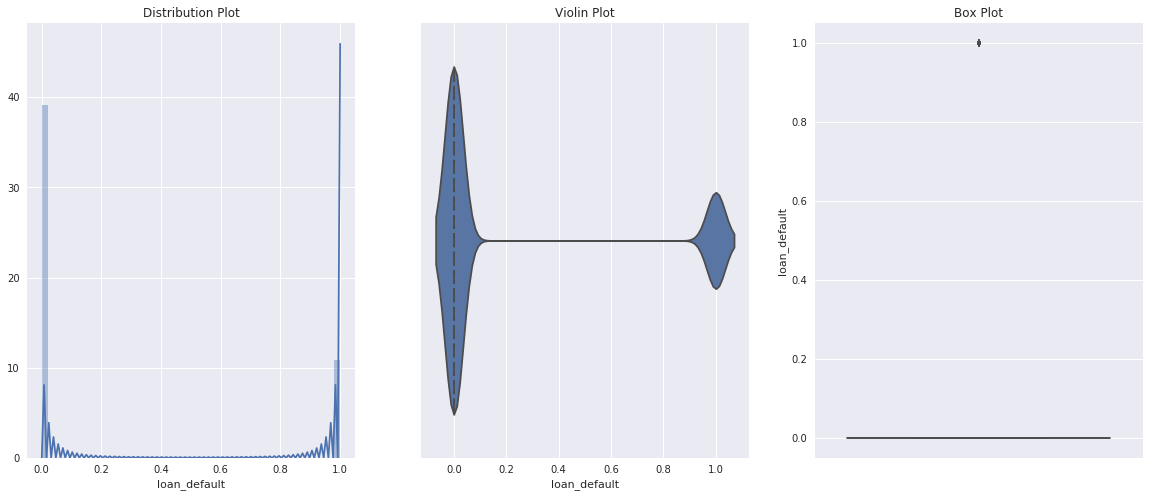

In [11]:
univariate(df=project_data_tr, col='loan_default',vartype=0)

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



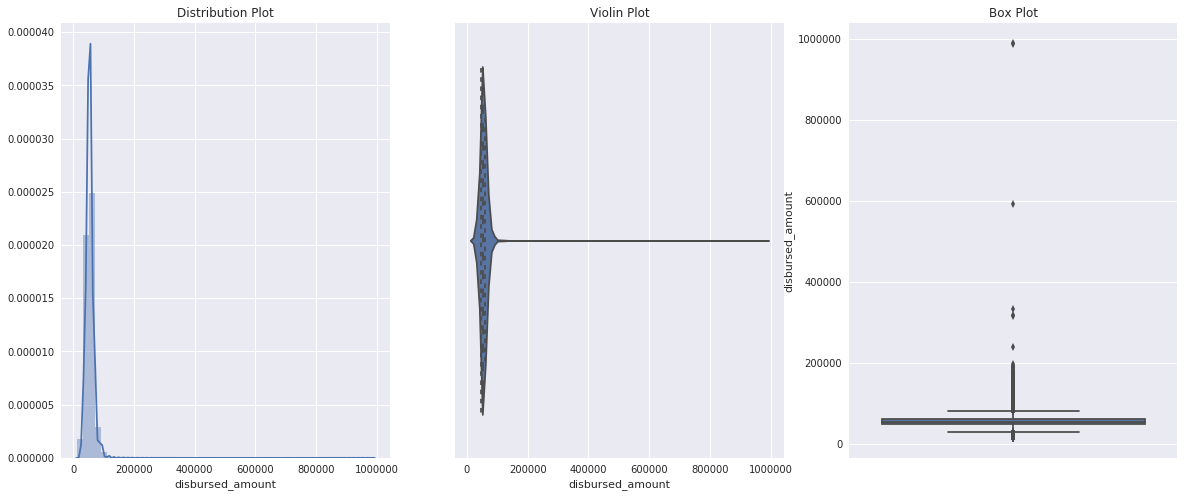

In [12]:
univariate(df=project_data_tr, col='disbursed_amount',vartype=0)

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



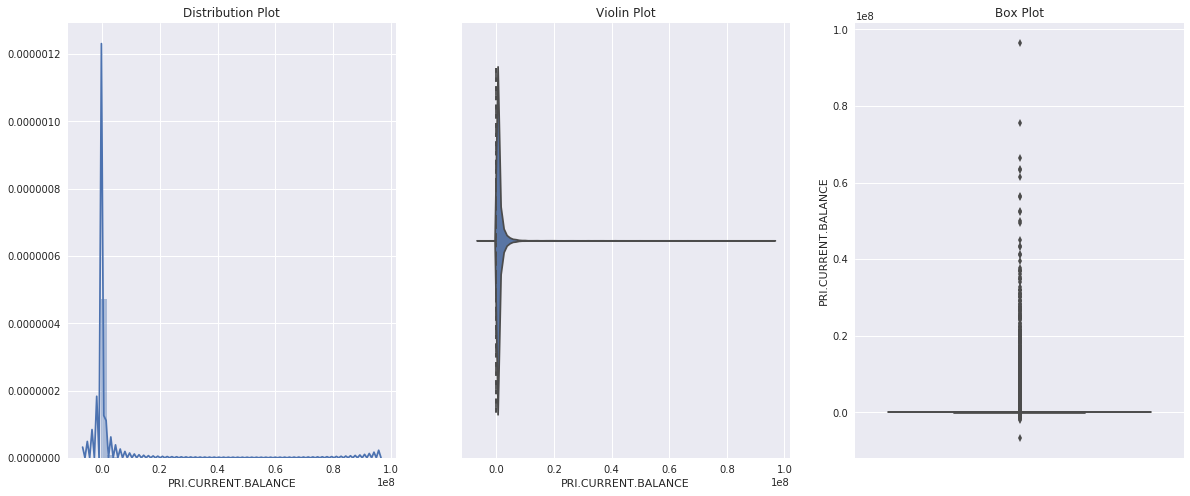

In [13]:
univariate(df=project_data_tr, col='PRI.CURRENT.BALANCE',vartype=0)

In [14]:
project_data_tr['label'] = project_data_tr.apply(lambda x : 1 if x['loan_default'] > 0.8 else 0, axis=1)

In [15]:
len(project_data_tr[project_data_tr['label'] == 0])

182543

In [16]:
y = project_data_tr['label']

In [17]:
project_data_tr.drop(['loan_default'], axis=1, inplace=True)

In [18]:
project_data_tr['Employment.Type'].fillna('Unemployed', inplace = True)
project_data_te['Employment.Type'].fillna('Unemployed', inplace = True)

# let's check if there is any null values still left or not
print("Null values left in the train set:", project_data_tr.isnull().sum().sum())
print("Null values left in the test set:", project_data_te.isnull().sum().sum())



Null values left in the train set: 0
Null values left in the test set: 0


### test & Train concat

In [19]:
data = pd.concat([project_data_tr, project_data_te], axis = 0, ignore_index=True)

In [20]:
data.shape

(345546, 41)

# Data Preprocessing

### Date Formatting to age

In [21]:
#from datetime import datetime
import datetime

def dateFormatChange(date) :
    d = datetime.datetime.strptime(date, '%d-%m-%y')
    if d.year > 2000 :
        d = d.replace(year=d.year-100)
        
    return d.strftime('%d-%m-%Y')


In [22]:
#from datetime import datetime
import datetime

def calculate_age(born):
    born = datetime.datetime.strptime(born, "%d-%m-%Y").date()
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


In [23]:
from datetime import datetime
import datetime


def calc_age_big(data, col) : 
    dates = []
    for i in range(len(data)) : 
        dates.append(dateFormatChange(data[col][i]))
    
    
    ages = []
    for i in range(len(data)) : 
        ages.append(calculate_age(dates[i]))
    
    
    return ages

### Duration to months conversion

In [24]:
import re

def totalMon(str) :
    replaced = re.sub('[yrsmon]', ' ', str)
    nowhite = ' '.join(replaced.split())
    a = nowhite.split()
    return a

In [25]:
def duration(data, col) : 
    mon = []
    for i in range(len(data)) :
        mon.append(totalMon(data[col][i]))
        
        
    total = []
    for i in range(len(data)) :
        total.append(int(mon[i][0])*12 + int(mon[i][1]))
        
    return total

### Featurization from CNS Score description

In [26]:
data['PERFORM_CNS.SCORE.DESCRIPTION'].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [27]:
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 1.4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 1.2)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',1.6)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 1.8)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0.5)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found', 1)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 10)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 10)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 8)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 8)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 6)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 2)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 2)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 2)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 2)

# checing the values in bureau score
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()


0.0     174843
2.0      75721
4.0      26364
8.0      17667
10.0     14590
3.0      10142
6.0       8260
1.4       5025
1.2       4940
1.6       4246
1.8       2299
0.5       1446
1.0          3
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

### Disbursal Date

In [28]:
data['DisbursalDate'] = pd.to_datetime(data['DisbursalDate'], errors = 'coerce')
data['DisbursalMonth'] = data['DisbursalDate'].dt.month
data['DisbursalMonth'].value_counts()

11    99420
10    89440
8     58586
9     57939
12    10659
3      7601
6      7024
4      4627
7      4339
5      4178
1      1708
2        25
Name: DisbursalMonth, dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345546 entries, 0 to 345545
Data columns (total 42 columns):
AVERAGE.ACCT.AGE                       345546 non-null object
Aadhar_flag                            345546 non-null int64
CREDIT.HISTORY.LENGTH                  345546 non-null object
Current_pincode_ID                     345546 non-null int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    345546 non-null int64
Date.of.Birth                          345546 non-null object
DisbursalDate                          345546 non-null datetime64[ns]
Driving_flag                           345546 non-null int64
Employee_code_ID                       345546 non-null int64
Employment.Type                        345546 non-null object
MobileNo_Avl_Flag                      345546 non-null int64
NEW.ACCTS.IN.LAST.SIX.MONTHS           345546 non-null int64
NO.OF_INQUIRIES                        345546 non-null int64
PAN_flag                               345546 non-null int64
PERFORM_CNS.SCORE     

### Adding extracted features

In [30]:
dob = calc_age_big(data, 'Date.of.Birth')

In [31]:
values_chl = duration(data, 'CREDIT.HISTORY.LENGTH')

In [32]:
values_aaccage = duration(data, 'AVERAGE.ACCT.AGE')

In [33]:
data['age'] = dob
data['values_chl'] = values_chl
data['values_aaccage'] = values_aaccage

In [34]:
data.tail(5)

AVERAGE.ACCT.AGE  Aadhar_flag CREDIT.HISTORY.LENGTH  \
345541        0yrs 0mon            1             0yrs 0mon   
345542        0yrs 0mon            1             0yrs 0mon   
345543       4yrs 10mon            1             9yrs 5mon   
345544        0yrs 3mon            1             0yrs 3mon   
345545        0yrs 0mon            1             0yrs 0mon   

        Current_pincode_ID  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS Date.of.Birth  \
345541                2591                                    0      14-05-92   
345542                2593                                    0      24-04-84   
345543                2593                                    0      01-01-86   
345544                2593                                    1      01-01-73   
345545                2593                                    0      01-01-74   

       DisbursalDate  Driving_flag  Employee_code_ID Employment.Type  \
345541    2018-11-28             0              3823   Self employed   
345542    2018-11-19             0              3823   Self employed   
345543    2018-11-17             0              3823   Self employed   
345544    2018-11-15             0              3823   Self employed   
345545    2018-11-28             0              3823   Self employed   

             ...        branch_id  disbursed_amount  label    ltv  \
345541       ...               74             44875    NaN  67.58   
345542       ...               74             53549    NaN  78.61   
345543       ...               74             55243    NaN  81.37   
345544       ...               74             55243    NaN  81.37   
345545       ...               74             40274    NaN  60.68   

        manufacturer_id  supplier_id  DisbursalMonth  age  values_chl  \
345541               86        16646              11   26           0   
345542               86        16646              11   34           0   
345543               86        16646              11   33         113   
345544               86        16646              11   46           3   
345545               86        16646              11   45           0   

        values_aaccage  
345541               0  
345542               0  
345543              58  
345544               3  
345545               0  

[5 rows x 45 columns]

In [35]:
data['branch_id'].unique()

array([ 67,  78,  34, 130,  74,  11,   5,  20,  63,  48,  79,   3,  42,
       142,  36,  16, 146, 147,  65,   9,   1, 152,  29,  10,  70,  19,
         7,  85,  61,  17,   8, 153,  18, 162,  68,  72,  64,   2, 160,
       251, 103, 104, 120, 136,  77,  13, 138, 135,  73, 248,  15, 165,
        62,  76, 105, 249, 250, 255, 254,  82, 158, 159, 117, 202, 259,
       207,  35,  69,  97,  43, 257, 258, 260, 111,  66, 261, 101,  14,
       121, 217,  84, 100])

In [36]:
data['supplier_id'].unique()

array([22807, 22744, 17014, ..., 24539, 24786, 24680])

In [37]:
len(data['supplier_id'].unique())

3089

In [38]:
data.head(10)

AVERAGE.ACCT.AGE  Aadhar_flag CREDIT.HISTORY.LENGTH  Current_pincode_ID  \
0        0yrs 0mon            1             0yrs 0mon                1441   
1       1yrs 11mon            1            1yrs 11mon                1502   
2        0yrs 0mon            1             0yrs 0mon                1497   
3        0yrs 8mon            1             1yrs 3mon                1501   
4        0yrs 0mon            1             0yrs 0mon                1495   
5        1yrs 9mon            1             2yrs 0mon                1501   
6        0yrs 0mon            1             0yrs 0mon                1502   
7        0yrs 2mon            1             0yrs 2mon                1501   
8        4yrs 8mon            1             4yrs 8mon                1497   
9        1yrs 7mon            0             1yrs 7mon                1492   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS Date.of.Birth DisbursalDate  \
0                                    0      01-01-84    2018-03-08   
1                                    1      31-07-85    2018-09-26   
2                                    0      24-08-85    2018-01-08   
3                                    0      30-12-93    2018-10-26   
4                                    0      09-12-77    2018-09-26   
5                                    0      08-09-90    2018-09-19   
6                                    0      01-06-88    2018-09-23   
7                                    0      04-10-89    2018-09-16   
8                                    0      15-11-91    2018-05-09   
9                                    0      01-06-68    2018-09-16   

   Driving_flag  Employee_code_ID Employment.Type       ...        branch_id  \
0             0              1998        Salaried       ...               67   
1             0              1998   Self employed       ...               67   
2             0              1998   Self employed       ...               67   
3             0              1998   Self employed       ...               67   
4             0              1998   Self employed       ...               67   
5             0              1998   Self employed       ...               67   
6             0              1998        Salaried       ...               67   
7             0              1998        Salaried       ...               67   
8             0              1998   Self employed       ...               67   
9             0              1998        Salaried       ...               67   

   disbursed_amount  label    ltv  manufacturer_id  supplier_id  \
0             50578    0.0  89.55               45        22807   
1             47145    1.0  73.23               45        22807   
2             53278    0.0  89.63               45        22807   
3             57513    1.0  88.48               45        22807   
4             52378    1.0  88.39               45        22807   
5             54513    0.0  89.66               45        22807   
6             46349    0.0  76.42               45        22807   
7             43894    0.0  71.89               45        22807   
8             53713    0.0  89.56               45        22807   
9             52603    0.0  86.95               45        22807   

   DisbursalMonth  age  values_chl  values_aaccage  
0               3   35           0               0  
1               9   33          23              23  
2               1   33           0               0  
3              10   25          15               8  
4               9   41           0               0  
5               9   28          24              21  
6               9   30           0               0  
7               9   29           2               2  
8               5   27          56              56  
9               9   50          19              19  

[10 rows x 45 columns]

In [39]:
project_data_tr.head(10)

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   
5    518279             54513       61900  89.66         67        22807   
6    529269             46349       61500  76.42         67        22807   
7    510278             43894       61900  71.89         67        22807   
8    490213             53713       61973  89.56         67        22807   
9    510980             52603       61300  86.95         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  ...    \
0               45                1441      01-01-84        Salaried  ...     
1               45                1502      31-07-85   Self employed  ...     
2               45                1497      24-08-85   Self employed  ...     
3               45                1501      30-12-93   Self employed  ...     
4               45                1495      09-12-77   Self employed  ...     
5               45                1501      08-09-90   Self employed  ...     
6               45                1502      01-06-88        Salaried  ...     
7               45                1501      04-10-89        Salaried  ...     
8               45                1497      15-11-91   Self employed  ...     
9               45                1492      01-06-68        Salaried  ...     

  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT  \
0                     0                     0                   0   
1                     0                     0                1991   
2                     0                     0                   0   
3                     0                     0                  31   
4                     0                     0                   0   
5                     0                     0                1347   
6                     0                     0                   0   
7                     0                     0                   0   
8                     0                     0                   0   
9                     0                     0                2608   

   SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   
5               0                             0   
6               0                             0   
7               0                             0   
8               0                             0   
9               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   
2                                    0         0yrs 0mon   
3                                    0         0yrs 8mon   
4                                    0         0yrs 0mon   
5                                    0         1yrs 9mon   
6                                    0         0yrs 0mon   
7                                    0         0yrs 2mon   
8                                    0         4yrs 8mon   
9                                    0         1yrs 7mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  label  
0              0yrs 0mon                0      0  
1             1yrs 11mon                0      1  
2              0yrs 0mon                0      0  
3              1yrs 3mon                1      1  
4              0yrs 0mon                1      1  
5      

In [40]:
data.tail(10)

AVERAGE.ACCT.AGE  Aadhar_flag CREDIT.HISTORY.LENGTH  \
345536        0yrs 0mon            1             0yrs 0mon   
345537       3yrs 10mon            1             6yrs 8mon   
345538        0yrs 0mon            1             0yrs 0mon   
345539        0yrs 0mon            1             0yrs 0mon   
345540        1yrs 1mon            1             1yrs 6mon   
345541        0yrs 0mon            1             0yrs 0mon   
345542        0yrs 0mon            1             0yrs 0mon   
345543       4yrs 10mon            1             9yrs 5mon   
345544        0yrs 3mon            1             0yrs 3mon   
345545        0yrs 0mon            1             0yrs 0mon   

        Current_pincode_ID  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS Date.of.Birth  \
345536                2591                                    0      01-01-82   
345537                2611                                    1      05-06-67   
345538                2578                                    0      10-01-89   
345539                2605                                    0      01-01-96   
345540                2593                                    0      01-01-76   
345541                2591                                    0      14-05-92   
345542                2593                                    0      24-04-84   
345543                2593                                    0      01-01-86   
345544                2593                                    1      01-01-73   
345545                2593                                    0      01-01-74   

       DisbursalDate  Driving_flag  Employee_code_ID Employment.Type  \
345536    2018-11-11             0              3823   Self employed   
345537    2018-11-17             0              3823   Self employed   
345538    2018-11-29             0              3823   Self employed   
345539    2018-11-30             0              3823   Self employed   
345540    2018-11-24             0              3823   Self employed   
345541    2018-11-28             0              3823   Self employed   
345542    2018-11-19             0              3823   Self employed   
345543    2018-11-17             0              3823   Self employed   
345544    2018-11-15             0              3823   Self employed   
345545    2018-11-28             0              3823   Self employed   

             ...        branch_id  disbursed_amount  label    ltv  \
345536       ...               74             46849    NaN  68.96   
345537       ...               74             55243    NaN  78.54   
345538       ...               74             44109    NaN  70.45   
345539       ...               74             53303    NaN  78.61   
345540       ...               74             50683    NaN  79.25   
345541       ...               74             44875    NaN  67.58   
345542       ...               74             53549    NaN  78.61   
345543       ...               74             55243    NaN  81.37   
345544       ...               74             55243    NaN  81.37   
345545       ...               74             40274    NaN  60.68   

        manufacturer_id  supplier_id  DisbursalMonth  age  values_chl  \
345536               86        16646              11   37           0   
345537               86        16646              11   51          80   
345538               86        16646              11   30           0   
345539               86        16646              11   23           0   
345540               86        16646              11   43          18   
345541               86        16646              11   26           0   
345542               86        16646              11   34           0   
345543               86        16646              11   33         113   
345544               86        16646              11   46           3   
345545               86        16646              11   45           0   

        values_aaccage  
345536               0  
345537              46  


In [41]:
project_data_te.tail(10)

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
112382    669006             46849       72509  68.96         74        16646   
112383    708464             55243       75122  78.54         74        16646   
112384    762274             44109       68136  70.45         74        16646   
112385    767673             53303       72509  78.61         74        16646   
112386    743207             50683       68136  79.25         74        16646   
112387    755547             44875       72509  67.58         74        16646   
112388    716994             53549       72509  78.61         74        16646   
112389    709352             55243       72509  81.37         74        16646   
112390    699795             55243       72509  81.37         74        16646   
112391    755244             40274       72509  60.68         74        16646   

        manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
112382               86                2591      01-01-82   Self employed   
112383               86                2611      05-06-67   Self employed   
112384               86                2578      10-01-89   Self employed   
112385               86                2605      01-01-96   Self employed   
112386               86                2593      01-01-76   Self employed   
112387               86                2591      14-05-92   Self employed   
112388               86                2593      24-04-84   Self employed   
112389               86                2593      01-01-86   Self employed   
112390               86                2593      01-01-73   Self employed   
112391               86                2593      01-01-74   Self employed   

             ...        SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  \
112382       ...                          0                      0   
112383       ...                          0                      0   
112384       ...                          0                      0   
112385       ...                          0                      0   
112386       ...                          0                      0   
112387       ...                          0                      0   
112388       ...                          0                      0   
112389       ...                          0                      0   
112390       ...                          0                      0   
112391       ...                          0                      0   

        SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  \
112382                     0                   0               0   
112383                     0                   0               0   
112384                     0                   0               0   
112385                     0                   0               0   
112386                     0                8350               0   
112387                     0                   0               0   
112388                     0                   0               0   
112389                     0                   0               0   
112390                     0                   0               0   
112391                     0                   0               0   

        NEW.ACCTS.IN.LAST.SIX.MONTHS  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  \
112382                             0                                    0   
112383                             0                                    1   
112384                             0                                    0   
112385                             0                                    0   
112386                             0                                    0   
112387                             0                                    0   
112388                             0                                    0   
112389                             0                                    0   
112390                             1                   

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345546 entries, 0 to 345545
Data columns (total 45 columns):
AVERAGE.ACCT.AGE                       345546 non-null object
Aadhar_flag                            345546 non-null int64
CREDIT.HISTORY.LENGTH                  345546 non-null object
Current_pincode_ID                     345546 non-null int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    345546 non-null int64
Date.of.Birth                          345546 non-null object
DisbursalDate                          345546 non-null datetime64[ns]
Driving_flag                           345546 non-null int64
Employee_code_ID                       345546 non-null int64
Employment.Type                        345546 non-null object
MobileNo_Avl_Flag                      345546 non-null int64
NEW.ACCTS.IN.LAST.SIX.MONTHS           345546 non-null int64
NO.OF_INQUIRIES                        345546 non-null int64
PAN_flag                               345546 non-null int64
PERFORM_CNS.SCORE     

In [122]:
data['PRI.SANCTIONED.AMOUNT']

0         0.000000
1         2.470114
2         0.000000
3         0.000000
4         0.000000
5         0.000000
6         0.000000
7         2.502957
8         2.625299
9         0.000000
10        0.000000
11        2.441962
12        2.497727
13        2.575575
14        2.572349
15        0.000000
16        2.700055
17        2.749729
18        0.000000
19        0.000000
20        2.431830
21        2.750544
22        0.000000
23        2.410061
24        0.000000
25        0.000000
26        0.000000
27        0.000000
28        0.000000
29        2.564971
            ...   
345516    0.000000
345517    0.000000
345518    0.000000
345519    2.448532
345520    0.000000
345521    0.000000
345522    0.000000
345523    2.515174
345524    2.671306
345525    0.000000
345526    0.000000
345527    0.000000
345528    2.420111
345529    0.000000
345530    0.000000
345531    2.530377
345532    0.000000
345533    0.000000
345534    0.000000
345535    2.492993
345536    0.000000
345537    2.

In [123]:
data['PRI.DISBURSED.AMOUNT']

0         0.000000
1         2.470114
2         0.000000
3         0.000000
4         0.000000
5         0.000000
6         0.000000
7         2.502957
8         2.625299
9         0.000000
10        0.000000
11        2.403283
12        2.497727
13        2.575575
14        2.572349
15        0.000000
16        2.700055
17        2.749729
18        0.000000
19        0.000000
20        2.431830
21        2.750140
22        0.000000
23        2.410061
24        0.000000
25        0.000000
26        0.000000
27        0.000000
28        0.000000
29        2.564971
            ...   
345516    0.000000
345517    0.000000
345518    0.000000
345519    2.448532
345520    0.000000
345521    0.000000
345522    0.000000
345523    2.513690
345524    2.671306
345525    0.000000
345526    0.000000
345527    0.000000
345528    2.420111
345529    0.000000
345530    0.000000
345531    2.530377
345532    0.000000
345533    0.000000
345534    0.000000
345535    2.492993
345536    0.000000
345537    2.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



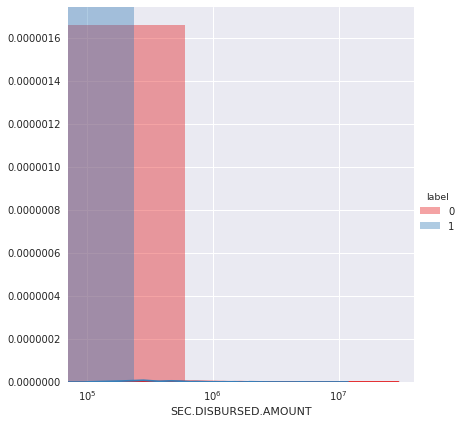

In [126]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.DISBURSED.AMOUNT") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



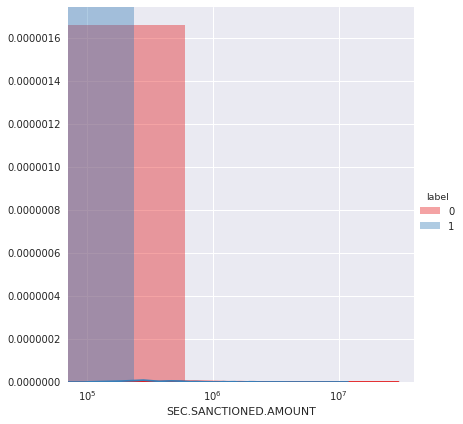

In [127]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.SANCTIONED.AMOUNT") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

In [43]:
len(data['Employee_code_ID'].unique())

3398

In [44]:
data['Employment.Type'] = data['Employment.Type'].replace('Salaried', 0)
data['Employment.Type'] = data['Employment.Type'].replace('Self employed', 1)
data['Employment.Type'] = data['Employment.Type'].replace('Unemployed', 2)

In [107]:
data['PRI.NO.OF.ACCTS'] = np.log1p(data['PRI.NO.OF.ACCTS'])
data['PRI.ACTIVE.ACCTS'] = np.log1p(data['PRI.ACTIVE.ACCTS'])
data['PRI.OVERDUE.ACCTS'] = np.log1p(data['PRI.OVERDUE.ACCTS'])
data['PRI.CURRENT.BALANCE'] = np.log1p(data['PRI.CURRENT.BALANCE'])
data['PRI.SANCTIONED.AMOUNT'] = np.log1p(data['PRI.SANCTIONED.AMOUNT'])
data['PRI.DISBURSED.AMOUNT'] = np.log1p(data['PRI.DISBURSED.AMOUNT'])

data['PRI.CURRENT.BALANCE'].fillna(data['PRI.CURRENT.BALANCE'].mean(), inplace = True)

In [108]:
data['SEC.NO.OF.ACCTS'] = np.log1p(data['SEC.NO.OF.ACCTS'])
data['SEC.ACTIVE.ACCTS'] = np.log1p(data['SEC.ACTIVE.ACCTS'])
data['SEC.OVERDUE.ACCTS'] = np.log1p(data['SEC.OVERDUE.ACCTS'])
data['SEC.CURRENT.BALANCE'] = np.log1p(data['SEC.CURRENT.BALANCE'])
data['SEC.SANCTIONED.AMOUNT'] = np.log1p(data['SEC.SANCTIONED.AMOUNT'])
data['SEC.DISBURSED.AMOUNT'] = np.log1p(data['SEC.DISBURSED.AMOUNT'])

data['SEC.CURRENT.BALANCE'].fillna(data['SEC.CURRENT.BALANCE'].mean(), inplace = True)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345546 entries, 0 to 345545
Data columns (total 45 columns):
AVERAGE.ACCT.AGE                       345546 non-null object
Aadhar_flag                            345546 non-null int64
CREDIT.HISTORY.LENGTH                  345546 non-null object
Current_pincode_ID                     345546 non-null int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    345546 non-null int64
Date.of.Birth                          345546 non-null object
DisbursalDate                          345546 non-null datetime64[ns]
Driving_flag                           345546 non-null int64
Employee_code_ID                       345546 non-null int64
Employment.Type                        345546 non-null int64
MobileNo_Avl_Flag                      345546 non-null int64
NEW.ACCTS.IN.LAST.SIX.MONTHS           345546 non-null int64
NO.OF_INQUIRIES                        345546 non-null int64
PAN_flag                               345546 non-null int64
PERFORM_CNS.SCORE      

In [110]:
X = data.iloc[:233154,:]
test = data.iloc[233154:,:]

## Train Test Split

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

### Categorical Encoding

In [112]:
def responseTable(table, col) :
    cat = table[col].unique()
    
    freqP = []
    for i in cat : 
        freqP.append(len(table.loc[(table[col] == i) & (table['label'] == 1)]))
        
        
    freqN = []
    for i in cat : 
        freqN.append(len(table.loc[(table[col] == i) & (table['label'] == 0)]))
        
    
    encodedP = []
    for i in range(len(cat)) :
        encodedP.append(freqP[i]/(freqP[i] + freqN[i]))
    
    encodedN = []
    encodedN[:] = [1 - x for x in encodedP]
        
    encodedPVAL = dict(zip(cat, encodedP)) 
    encodedNVAL = dict(zip(cat, encodedN)) 
    
    return encodedPVAL, encodedNVAL
        

In [113]:
def responseCoding(table) : 
    posBI, negBI = responseTable(table,'branch_id')
    posMI, negMI = responseTable(table,'manufacturer_id')
    posSS, negSS = responseTable(table, 'State_ID')
    posTP, negTP = responseTable(table, 'Current_pincode_ID')
    posSI, negSI = responseTable(table, 'supplier_id')
    posECI, negECI = responseTable(table, 'Employee_code_ID')

    
    df = pd.DataFrame()
    df['bid_p'] = table['branch_id'].map(posBI)
    df['bid_n'] = table['branch_id'].map(negBI)
    df['mid_p'] = table['manufacturer_id'].map(posMI)
    df['mid_n'] = table['manufacturer_id'].map(negMI)
    df['sid_p'] = table['State_ID'].map(posSS)
    df['sid_n'] = table['State_ID'].map(negSS)
    df['cpid_p'] = table['Current_pincode_ID'].map(posTP)
    df['cpid_n'] = table['Current_pincode_ID'].map(negTP)
    df['suid_p'] = table['supplier_id'].map(posSI)
    df['suid_n'] = table['supplier_id'].map(negSI)
    df['ecid_p'] = table['Employee_code_ID'].map(posECI)
    df['ecid_n'] = table['Employee_code_ID'].map(negECI)

    return df

In [114]:
newTR = responseCoding(X_train)
newTE = responseCoding(X_test)

In [115]:
final_df_tr = X_train.drop(['UniqueID', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'DisbursalDate', 'label'], axis=1)
final_df_te = X_test.drop(['UniqueID', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'DisbursalDate', 'label'], axis=1)

In [116]:
final_df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156213 entries, 92880 to 57463
Data columns (total 33 columns):
Aadhar_flag                            156213 non-null int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    156213 non-null int64
Driving_flag                           156213 non-null int64
Employment.Type                        156213 non-null int64
MobileNo_Avl_Flag                      156213 non-null int64
NEW.ACCTS.IN.LAST.SIX.MONTHS           156213 non-null int64
NO.OF_INQUIRIES                        156213 non-null int64
PAN_flag                               156213 non-null int64
PERFORM_CNS.SCORE                      156213 non-null int64
PERFORM_CNS.SCORE.DESCRIPTION          156213 non-null float64
PRI.ACTIVE.ACCTS                       156213 non-null float64
PRI.CURRENT.BALANCE                    156213 non-null float64
PRI.DISBURSED.AMOUNT                   156213 non-null float64
PRI.NO.OF.ACCTS                        156213 non-null float64
PRI.OVERDUE.ACCTS     

In [117]:
final_df_tr.head()

Aadhar_flag  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  Driving_flag  \
92880             1                                    0             0   
200664            1                                    0             0   
65253             1                                    0             0   
165975            0                                    0             0   
104497            1                                    0             0   

        Employment.Type  MobileNo_Avl_Flag  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
92880                 1                  1                             0   
200664                1                  1                             0   
65253                 1                  1                             0   
165975                1                  1                             1   
104497                2                  1                             0   

        NO.OF_INQUIRIES  PAN_flag  PERFORM_CNS.SCORE  \
92880                 0         0                825   
200664                0         0                  0   
65253                 0         0                  0   
165975                0         0                670   
104497                0         0                  0   

        PERFORM_CNS.SCORE.DESCRIPTION       ...        SEC.OVERDUE.ACCTS  \
92880                             2.0       ...                      0.0   
200664                            0.0       ...                      0.0   
65253                             0.0       ...                      0.0   
165975                            4.0       ...                      0.0   
104497                            0.0       ...                      0.0   

        SEC.SANCTIONED.AMOUNT  VoterID_flag  asset_cost  disbursed_amount  \
92880                     0.0             1       74671             43394   
200664                    0.0             0       65536             43049   
65253                     0.0             0       97980             50458   
165975                    0.0             1       71141             58359   
104497                    0.0             0       65012             45150   

          ltv  DisbursalMonth  age  values_chl  values_aaccage  
92880   60.26               9   39          27              18  
200664  68.66               8   29           0               0  
65253   55.11              10   22           0               0  
165975  83.07              10   32           5               4  
104497  73.06               9   25           0               0  

[5 rows x 33 columns]

In [118]:
final_df_tr.shape

(156213, 33)

## Stacking

In [119]:
from scipy.sparse import hstack

X_tr = hstack((final_df_tr, newTR)).tocsr()
X_te = hstack((final_df_te, newTE)).tocsr()

In [120]:
X_tr.shape

(156213, 45)

In [121]:
final_df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156213 entries, 92880 to 57463
Data columns (total 33 columns):
Aadhar_flag                            156213 non-null int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    156213 non-null int64
Driving_flag                           156213 non-null int64
Employment.Type                        156213 non-null int64
MobileNo_Avl_Flag                      156213 non-null int64
NEW.ACCTS.IN.LAST.SIX.MONTHS           156213 non-null int64
NO.OF_INQUIRIES                        156213 non-null int64
PAN_flag                               156213 non-null int64
PERFORM_CNS.SCORE                      156213 non-null int64
PERFORM_CNS.SCORE.DESCRIPTION          156213 non-null float64
PRI.ACTIVE.ACCTS                       156213 non-null float64
PRI.CURRENT.BALANCE                    156213 non-null float64
PRI.DISBURSED.AMOUNT                   156213 non-null float64
PRI.NO.OF.ACCTS                        156213 non-null float64
PRI.OVERDUE.ACCTS     

# Model Training

In [128]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier()

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}
clf1 = GridSearchCV(rfc1, parameters, cv=3, scoring='roc_auc', verbose=10, n_jobs = -1)
se1 = clf1.fit(X_tr, y_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 16.8min
/home/pritam_sk/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done  67 tasks  

KeyboardInterrupt: 

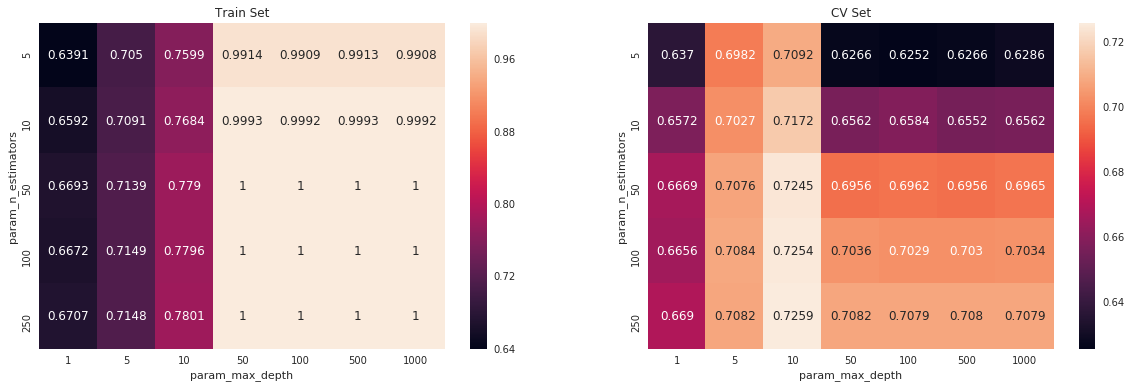

In [77]:
import seaborn as sns; sns.set()


max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [63]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

## ROC Curve

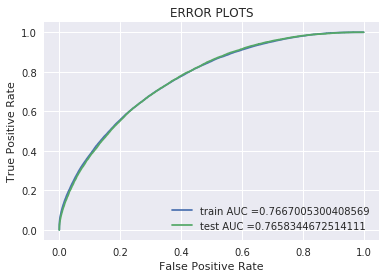

In [84]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


clf11 = RandomForestClassifier(max_depth = 10, n_estimators = 250)
#clfV1 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

clf11.fit(X_tr, y_train)
#clfV1.fit(X_tr1, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred1 = batch_predict(clf11, X_tr)    
y_test_pred1 = batch_predict(clf11, X_te)

train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

## Confusion Matrix

In [85]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.47876247529922755 for threshold 0.242
the maximum value of tpr*(1-fpr) 0.4787515289379705 for threshold 0.236


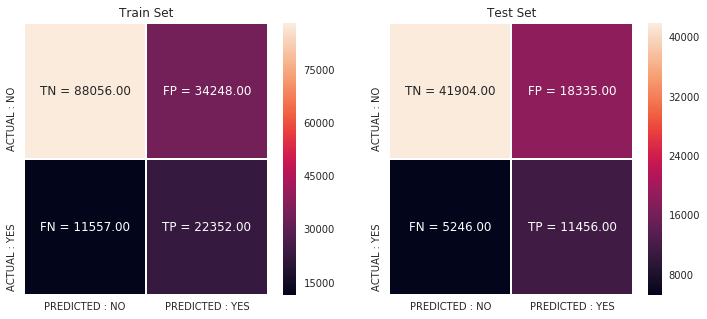

In [86]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

## XGBoost

In [60]:
#https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearnfrom sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

rfc2 = XGBClassifier()

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}
clf2 = GridSearchCV(rfc2, parameters, cv=3, scoring='roc_auc', n_jobs = -1, verbose=10)
se2 = clf2.fit(X_tr, y_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 46.2min
/home/pritam_sk/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 80.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 122.9min
[Parallel(n_jobs=-1)]: Done 105 out of

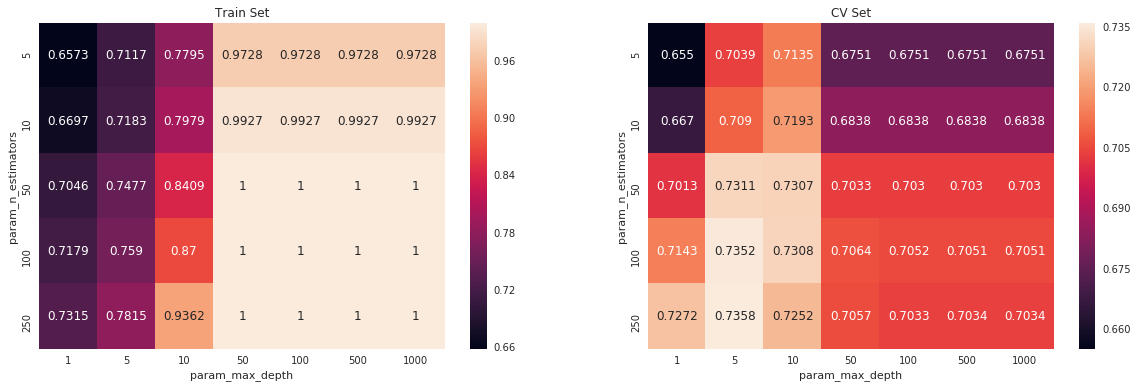

In [61]:
import seaborn as sns; sns.set()


max_scores2 = pd.DataFrame(clf2.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores2.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores2.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

## ROC Curve

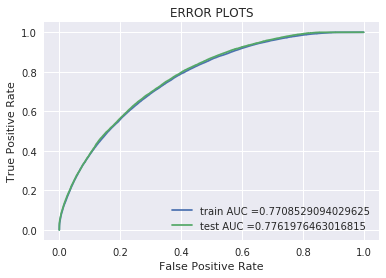

In [64]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve


from xgboost import XGBClassifier


clf2 = XGBClassifier(max_depth = 5, n_estimators = 250, scale_pos_weight = 3.6068300451207644, n_jobs = -1)
#clfV2 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

#vect = DictVectorizer(sparse=False)
#trans = vect.fit_transform(X_te2)

clf2.fit(X_tr, y_train)
#clfV2.fit(X_tr2, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred2 = batch_predict(clf2, X_tr)    
y_test_pred2 = batch_predict(clf2, X_te)

train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(y_train, y_train_pred2)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred2)

plt.plot(train_fpr2, train_tpr2, label="train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr2, test_tpr2, label="test AUC ="+str(auc(test_fpr2, test_tpr2)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

## Confusion Matrix

In [65]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.48374999396220064 for threshold 0.532
the maximum value of tpr*(1-fpr) 0.4877513758714789 for threshold 0.521


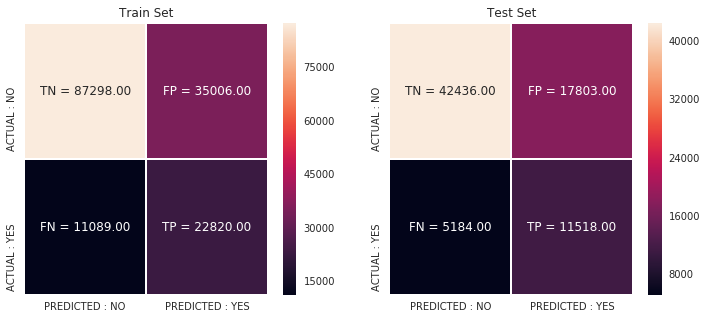

In [66]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred2, tr_thresholds2, train_fpr2, train_tpr2))
con_m_test = confusion_matrix(y_test, predict(y_test_pred2, te_thresholds2, test_fpr2, test_tpr2))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

### Logistic Regression

In [ ]:
X_tr

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_tr_SC = sc.fit_transform(X_tr.todense())
X_te_SC = sc.transform(X_te.todense())

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression()

parameters = {'C': [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
#parameters = {'alpha':[0.0001, 0.0025, 0.0005, 0.0075, 0.001, 0.025, .005, 0.075, 0.1, 0.25, 0.5, 0.75, 1]} 

clf = GridSearchCV(lr1, parameters, cv=5, scoring='roc_auc', n_jobs = -1, verbose=5)
clr3 = clf.fit(X_tr_SC, y_train)

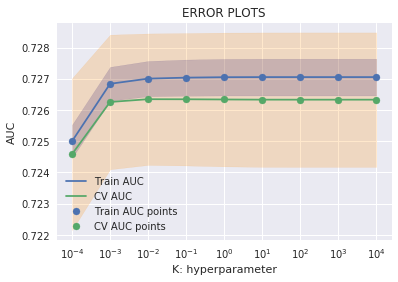

[0.72500163 0.72684171 0.72700702 0.72703916 0.72705323 0.72705632
 0.72705654 0.72705653 0.72705654]
[0.7245866  0.72625888 0.72634772 0.72634552 0.72633888 0.72633359
 0.72633284 0.72633279 0.72633277]


In [94]:
train_auc3= clf.cv_results_['mean_train_score']
train_auc_std3= clf.cv_results_['std_train_score']
cv_auc3 = clf.cv_results_['mean_test_score'] 
cv_auc_std3 = clf.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc3, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc3 - train_auc_std3,train_auc3 + train_auc_std3,alpha=0.2,color='darkblue')

plt.plot(parameters['C'], cv_auc3, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc3 - cv_auc_std3, cv_auc3 + cv_auc_std3,alpha=0.2,color='darkorange')

plt.scatter(parameters['C'], train_auc3, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc3, label='CV AUC points')

plt.xscale('log')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

print(train_auc3)
print(cv_auc3)       #k_best = 1.0


## ROC CURVE

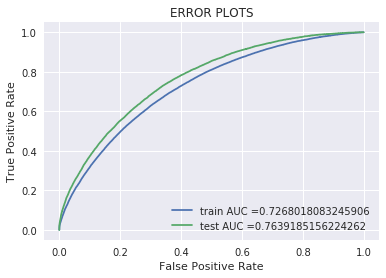

In [96]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.metrics import roc_curve, auc


clf = LogisticRegression(C=10**-2, penalty='l1');
clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred3 = batch_predict(clf, X_tr_SC)    
y_test_pred3 = batch_predict(clf, X_te_SC)

train_fpr3, train_tpr3, tr_thresholds3 = roc_curve(y_train, y_train_pred3)
test_fpr3, test_tpr3, te_thresholds3 = roc_curve(y_test, y_test_pred3)

plt.plot(train_fpr3, train_tpr3, label="train AUC ="+str(auc(train_fpr3, train_tpr3)))
plt.plot(test_fpr3, test_tpr3, label="test AUC ="+str(auc(test_fpr3, test_tpr3)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

## Confusion Matrix

In [98]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.44318726561667754 for threshold 0.215
the maximum value of tpr*(1-fpr) 0.4814245649353685 for threshold 0.23


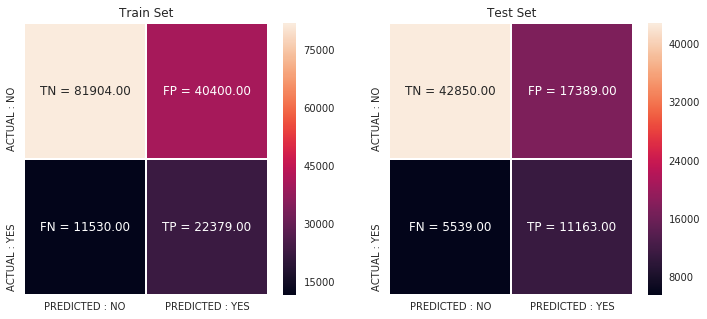

In [99]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred3, tr_thresholds3, train_fpr3, train_tpr3))
con_m_test = confusion_matrix(y_test, predict(y_test_pred3, te_thresholds3, test_fpr3, test_tpr3))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

In [67]:
newTR

bid_p     bid_n     mid_p     mid_n     sid_p     sid_n    cpid_p  \
114555  0.223874  0.776126  0.204062  0.795938  0.222070  0.777930  0.225000   
41666   0.191664  0.808336  0.204062  0.795938  0.198744  0.801256  0.305556   
232960  0.275332  0.724668  0.270299  0.729701  0.208346  0.791654  0.250000   
222728  0.201754  0.798246  0.204062  0.795938  0.183965  0.816035  0.200000   
103875  0.163333  0.836667  0.204062  0.795938  0.183965  0.816035  0.203947   
35851   0.132831  0.867169  0.204062  0.795938  0.187308  0.812692  0.148148   
1772    0.189382  0.810618  0.204062  0.795938  0.179780  0.820220  0.100000   
48963   0.275332  0.724668  0.204062  0.795938  0.208346  0.791654  0.203200   
140659  0.187143  0.812857  0.230122  0.769878  0.187143  0.812857  0.000000   
211141  0.194884  0.805116  0.204062  0.795938  0.204594  0.795406  0.202773   
135392  0.237688  0.762312  0.209965  0.790035  0.231805  0.768195  0.400000   
191646  0.177624  0.822376  0.230122  0.769878  0.204594  0.795406  0.113636   
7293    0.283019  0.716981  0.204062  0.795938  0.187308  0.812692  0.185714   
137166  0.294957  0.705043  0.204062  0.795938  0.304344  0.695656  0.178571   
66245   0.294957  0.705043  0.209965  0.790035  0.304344  0.695656  0.291667   
14623   0.150948  0.849052  0.204062  0.795938  0.187308  0.812692  0.190476   
189052  0.224536  0.775464  0.204062  0.795938  0.219202  0.780798  0.120000   
164459  0.230909  0.769091  0.204062  0.795938  0.219202  0.780798  0.230769   
59814   0.224536  0.775464  0.204062  0.795938  0.219202  0.780798  0.239583   
146025  0.197795  0.802205  0.204062  0.795938  0.204594  0.795406  0.230303   
131403  0.227300  0.772700  0.204062  0.795938  0.204594  0.795406  0.270833   
66033   0.135773  0.864227  0.216841  0.783159  0.187308  0.812692  0.135593   
204192  0.195082  0.804918  0.204062  0.795938  0.219202  0.780798  0.190476   
165189  0.187014  0.812986  0.219869  0.780131  0.208346  0.791654  0.302326   
70481   0.217201  0.782799  0.204062  0.795938  0.198744  0.801256  0.227273   
211094  0.132831  0.867169  0.209965  0.790035  0.187308  0.812692  0.185185   
217494  0.200276  0.799724  0.230122  0.769878  0.187308  0.812692  0.400000   
202187  0.181679  0.818321  0.219869  0.780131  0.194049  0.805951  0.250000   
161084  0.208112  0.791888  0.216841  0.783159  0.187308  0.812692  0.278481   
145396  0.218905  0.781095  0.230122  0.769878  0.231805  0.768195  0.250000   
...          ...       ...       ...       ...       ...       ...       ...   
68818   0.294957  0.705043  0.204062  0.795938  0.304344  0.695656  0.366667   
87549   0.155894  0.844106  0.204062  0.795938  0.208346  0.791654  0.333333   
201755  0.181679  0.818321  0.204062  0.795938  0.194049  0.805951  0.228571   
60638   0.194884  0.805116  0.204062  0.795938  0.204594  0.795406  0.179775   
162453  0.208112  0.791888  0.270299  0.729701  0.187308  0.812692  0.300000   
155003  0.234645  0.765355  0.209965  0.790035  0.208346  0.791654  0.316456   
4224    0.273258  0.726742  0.270299  0.729701  0.304344  0.695656  0.250000   
41171   0.265935  0.734065  0.230122  0.769878  0.265935  0.734065  0.300000   
130815  0.155894  0.844106  0.204062  0.795938  0.208346  0.791654  0.272727   
149446  0.181773  0.818227  0.204062  0.795938  0.202121  0.797879  0.226804   
6114    0.150948  0.849052  0.204062  0.795938  0.187308  0.812692  0.066667   
223504  0.184569  0.815431  0.209965  0.790035  0.210358  0.789642  0.160000   
26990   0.187014  0.812986  0.230122  0.769878  0.208346  0.791654  0.227766   
182049  0.202781  0.797219  0.204062  0.795938  0.202121  0.797879  0.150000   
43338   0.150948  0.849052  0.270299  0.729701  0.187308  0.812692  0.193548   
99404   0.181679  0.818321  0.209965  0.790035  0.194049  0.805951  0.186047   
108515  0.200000  0.800000  0.204062  0.795938  0.204594  0.795406  0.245902   
160890  0.208112  0.791888  0.216841  0.783159  0.187308  0.812692  0.207547   
90329   0.1

In [68]:
newTE

bid_p     bid_n     mid_p     mid_n     sid_p     sid_n    cpid_p  \
182019  0.222222  0.777778  0.225180  0.774820  0.182870  0.817130  0.272727   
189137  0.164130  0.835870  0.222644  0.777356  0.183936  0.816064  0.312500   
153647  0.307692  0.692308  0.203880  0.796120  0.311206  0.688794  0.277778   
134983  0.207739  0.792261  0.205673  0.794327  0.224781  0.775219  0.000000   
121473  0.224138  0.775862  0.225180  0.774820  0.183936  0.816064  0.363636   
80951   0.281000  0.719000  0.225180  0.774820  0.247761  0.752239  0.344828   
229086  0.199370  0.800630  0.276973  0.723027  0.217607  0.782393  0.187500   
39140   0.190972  0.809028  0.205673  0.794327  0.207758  0.792242  0.243902   
175634  0.194643  0.805357  0.222617  0.777383  0.206836  0.793164  0.000000   
230944  0.166057  0.833943  0.225180  0.774820  0.206836  0.793164  0.210526   
144175  0.166057  0.833943  0.205673  0.794327  0.206836  0.793164  1.000000   
48691   0.177251  0.822749  0.222617  0.777383  0.206836  0.793164  0.133333   
220124  0.192308  0.807692  0.225180  0.774820  0.207758  0.792242  0.343750   
102105  0.287943  0.712057  0.225180  0.774820  0.206836  0.793164  0.188235   
90819   0.281000  0.719000  0.205673  0.794327  0.279869  0.720131  0.307692   
80677   0.186560  0.813440  0.205673  0.794327  0.206836  0.793164  0.264706   
38498   0.264808  0.735192  0.205673  0.794327  0.206836  0.793164  0.333333   
45845   0.204986  0.795014  0.205673  0.794327  0.215428  0.784572  0.217391   
209494  0.292889  0.707111  0.205673  0.794327  0.279869  0.720131  0.279070   
168717  0.264808  0.735192  0.203880  0.796120  0.206836  0.793164  0.234921   
137744  0.202128  0.797872  0.225180  0.774820  0.198859  0.801141  0.107143   
157626  0.174072  0.825928  0.203880  0.796120  0.178355  0.821645  0.201389   
153965  0.307692  0.692308  0.276973  0.723027  0.311206  0.688794  0.526316   
207901  0.190972  0.809028  0.205673  0.794327  0.207758  0.792242  0.215686   
101606  0.210948  0.789052  0.203880  0.796120  0.183936  0.816064  0.000000   
137412  0.292889  0.707111  0.205673  0.794327  0.247761  0.752239  0.133333   
126398  0.134532  0.865468  0.225180  0.774820  0.183936  0.816064  0.000000   
75640   0.186560  0.813440  0.205673  0.794327  0.206836  0.793164  0.187500   
212419  0.264808  0.735192  0.205673  0.794327  0.206836  0.793164  0.333333   
180778  0.348497  0.651503  0.222617  0.777383  0.311206  0.688794  0.208333   
...          ...       ...       ...       ...       ...       ...       ...   
44312   0.134532  0.865468  0.205673  0.794327  0.183936  0.816064  0.000000   
116161  0.166057  0.833943  0.205673  0.794327  0.206836  0.793164  0.219178   
8251    0.210526  0.789474  0.205673  0.794327  0.183936  0.816064  0.444444   
33320   0.140255  0.859745  0.205673  0.794327  0.167607  0.832393  0.142857   
139155  0.186560  0.813440  0.205673  0.794327  0.206836  0.793164  0.200000   
64650   0.264808  0.735192  0.225180  0.774820  0.206836  0.793164  0.233333   
13736   0.166057  0.833943  0.225180  0.774820  0.206836  0.793164  0.203390   
216584  0.210526  0.789474  0.222644  0.777356  0.183936  0.816064  0.166667   
138211  0.204986  0.795014  0.205673  0.794327  0.215428  0.784572  0.193548   
98551   0.174072  0.825928  0.205673  0.794327  0.214020  0.785980  0.137500   
103248  0.186560  0.813440  0.205673  0.794327  0.206836  0.793164  0.192308   
134478  0.207739  0.792261  0.205673  0.794327  0.224781  0.775219  0.066667   
151280  0.174072  0.825928  0.203880  0.796120  0.178355  0.821645  0.275362   
225656  0.264808  0.735192  0.222644  0.777356  0.206836  0.793164  0.071429   
128171  0.294887  0.705113  0.276973  0.723027  0.207758  0.792242  0.363636   
41985   0.166057  0.833943  0.225180  0.774820  0.206836  0.793164  0.161616   
35650   0.166488  0.833512  0.205673  0.794327  0.206836  0.793164  0.130435   
224301  0.261905  0.738095  0.276973  0.723027  0.224781  0.775219  0.083333   
224896  0.2

In [69]:
test.head()

AVERAGE.ACCT.AGE  Aadhar_flag CREDIT.HISTORY.LENGTH  \
233154        0yrs 0mon            1             0yrs 0mon   
233155        0yrs 8mon            1             1yrs 0mon   
233156        0yrs 0mon            1             0yrs 0mon   
233157        2yrs 5mon            1             2yrs 5mon   
233158        0yrs 0mon            1             0yrs 0mon   

        Current_pincode_ID  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS Date.of.Birth  \
233154                1497                                    0      01-01-74   
233155                1497                                    0      20-05-85   
233156                2071                                    0      14-10-95   
233157                2070                                    0      01-06-73   
233158                2069                                    0      01-06-72   

       DisbursalDate  Driving_flag  Employee_code_ID  Employment.Type  \
233154    2018-03-11             0              1998                0   
233155    2018-11-20             0              1998                1   
233156    2018-11-29             0              1646                0   
233157    2018-11-29             0              1646                1   
233158    2018-11-17             0              1646                0   

             ...        branch_id  disbursed_amount  label    ltv  \
233154       ...               67             53478    NaN  86.54   
233155       ...               67             55513    NaN  89.45   
233156       ...               78             65282    NaN  79.93   
233157       ...               78             46905    NaN  76.58   
233158       ...               78             51428    NaN  86.08   

        manufacturer_id  supplier_id  DisbursalMonth  age  values_chl  \
233154               45        22807               3   45           0   
233155               45        22807              11   33          12   
233156               86        23135              11   23           0   
233157               45        17014              11   45          29   
233158               45        17014              11   46           0   

        values_aaccage  
233154               0  
233155               8  
233156               0  
233157              29  
233158               0  

[5 rows x 45 columns]

In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 233154 to 345545
Data columns (total 45 columns):
AVERAGE.ACCT.AGE                       112392 non-null object
Aadhar_flag                            112392 non-null int64
CREDIT.HISTORY.LENGTH                  112392 non-null object
Current_pincode_ID                     112392 non-null int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    112392 non-null int64
Date.of.Birth                          112392 non-null object
DisbursalDate                          112392 non-null datetime64[ns]
Driving_flag                           112392 non-null int64
Employee_code_ID                       112392 non-null int64
Employment.Type                        112392 non-null int64
MobileNo_Avl_Flag                      112392 non-null int64
NEW.ACCTS.IN.LAST.SIX.MONTHS           112392 non-null int64
NO.OF_INQUIRIES                        112392 non-null int64
PAN_flag                               112392 non-null int64
PERFORM_CNS.SCORE 

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 45 columns):
AVERAGE.ACCT.AGE                       233154 non-null object
Aadhar_flag                            233154 non-null int64
CREDIT.HISTORY.LENGTH                  233154 non-null object
Current_pincode_ID                     233154 non-null int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    233154 non-null int64
Date.of.Birth                          233154 non-null object
DisbursalDate                          233154 non-null datetime64[ns]
Driving_flag                           233154 non-null int64
Employee_code_ID                       233154 non-null int64
Employment.Type                        233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
NEW.ACCTS.IN.LAST.SIX.MONTHS           233154 non-null int64
NO.OF_INQUIRIES                        233154 non-null int64
PAN_flag                               233154 non-null int64
PERFORM_CNS.SCORE      

In [72]:
trainRC = responseCoding(X)

In [73]:
trainRC

bid_p     bid_n     mid_p     mid_n     sid_p     sid_n    cpid_p  \
0       0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.055556   
1       0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.285714   
2       0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.234043   
3       0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.133333   
4       0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.642857   
5       0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.133333   
6       0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.285714   
7       0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.133333   
8       0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.234043   
9       0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.214286   
10      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.666667   
11      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.199307   
12      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.234043   
13      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.234043   
14      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.642857   
15      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.130435   
16      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.130435   
17      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.181818   
18      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.133333   
19      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.250000   
20      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.234043   
21      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.181818   
22      0.194032  0.805968  0.204594  0.795406  0.205641  0.794359  0.166667   
23      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.250000   
24      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.135593   
25      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.250000   
26      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.250000   
27      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.234043   
28      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.234043   
29      0.194032  0.805968  0.228499  0.771501  0.205641  0.794359  0.125000   
...          ...       ...       ...       ...       ...       ...       ...   
233124  0.233696  0.766304  0.220750  0.779250  0.211527  0.788473  0.200000   
233125  0.233696  0.766304  0.220750  0.779250  0.211527  0.788473  0.250000   
233126  0.233696  0.766304  0.220750  0.779250  0.211527  0.788473  0.000000   
233127  0.233696  0.766304  0.220750  0.779250  0.211527  0.788473  0.200000   
233128  0.233696  0.766304  0.220750  0.779250  0.211527  0.788473  0.125000   
233129  0.233696  0.766304  0.220750  0.779250  0.211527  0.788473  0.250000   
233130  0.233696  0.766304  0.220750  0.779250  0.211527  0.788473  0.200000   
233131  0.233696  0.766304  0.220750  0.779250  0.211527  0.788473  0.000000   
233132  0.233696  0.766304  0.220750  0.779250  0.211527  0.788473  0.200000   
233133  0.182063  0.817937  0.204594  0.795406  0.205641  0.794359  0.154362   
233134  0.182063  0.817937  0.272531  0.727469  0.205641  0.794359  0.163462   
233135  0.182063  0.817937  0.272531  0.727469  0.205641  0.794359  0.115942   
233136  0.182063  0.817937  0.228499  0.771501  0.205641  0.794359  0.115942   
233137  0.182063  0.817937  0.272531  0.727469  0.205641  0.794359  0.163462   
233138  0.182063  0.817937  0.272531  0.727469  0.205641  0.794359  0.141618   
233139  0.182063  0.817937  0.204594  0.795406  0.205641  0.794359  0.163462   
233140  0.182063  0.817937  0.272531  0.727469  0.205641  0.794359  0.115942   
233141  0.182063  0.817937  0.272531  0.727469  0.205641  0.794359  0.198198   
233142  0.1

In [74]:
X_filter = X[['branch_id','manufacturer_id', 'State_ID', 'Current_pincode_ID', 'supplier_id', 'Employee_code_ID']]

In [75]:
X_filter

branch_id  manufacturer_id  State_ID  Current_pincode_ID  supplier_id  \
0              67               45         6                1441        22807   
1              67               45         6                1502        22807   
2              67               45         6                1497        22807   
3              67               45         6                1501        22807   
4              67               45         6                1495        22807   
5              67               45         6                1501        22807   
6              67               45         6                1502        22807   
7              67               45         6                1501        22807   
8              67               45         6                1497        22807   
9              67               45         6                1492        22807   
10             67               45         6                1493        22807   
11             67               45         6                1446        22807   
12             67               45         6                1497        22807   
13             67               45         6                1497        22807   
14             67               45         6                1495        22807   
15             67               45         6                1440        22807   
16             67               45         6                1440        22807   
17             67               45         6                1498        22807   
18             67               45         6                1479        22807   
19             67               45         6                1468        22807   
20             67               45         6                1497        22807   
21             67               45         6                1498        22807   
22             67               86         6                1499        22744   
23             67               45         6                1468        22807   
24             67               45         6                1480        22807   
25             67               45         6                1494        22807   
26             67               45         6                1468        22807   
27             67               45         6                1497        22807   
28             67               45         6                1497        22807   
29             67               45         6                1473        22807   
...           ...              ...       ...                 ...          ...   
233124        101              120        15                 701        24031   
233125        101              120        15                 696        24031   
233126        101              120        15                 692        24031   
233127        101              120        15                 701        24031   
233128        101              120        15                 705        24031   
233129        101              120        15                 696        24031   
233130        101              120        15                 687        24031   
233131        101              120        15                 690        24031   
233132        101              120        15                 687        24031   
233133         34               86         6                 977        23024   
233134         34               48         6                1050        20700   
233135         34               48         6                1051        20700   
233136         34               45         6                1051        21081   
233137         34               48         6                1050        20700   
233138         34               48         6                 992        20700   
233139         34               86         6                1050        23024   
233140         34               48         6                1051        20700   
233141         34               48     

In [76]:
test_drop = test.drop(['UniqueID', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'DisbursalDate', 'label'], axis=1)

In [77]:
test_drop.head()

Aadhar_flag  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  Driving_flag  \
233154            1                                    0             0   
233155            1                                    0             0   
233156            1                                    0             0   
233157            1                                    0             0   
233158            1                                    0             0   

        Employment.Type  MobileNo_Avl_Flag  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
233154                0                  1                             0   
233155                1                  1                             1   
233156                0                  1                             0   
233157                1                  1                             0   
233158                0                  1                             0   

        NO.OF_INQUIRIES  PAN_flag  PERFORM_CNS.SCORE  \
233154                0         0                  0   
233155                1         0                749   
233156                0         1                  0   
233157                0         0                 14   
233158                0         0                  0   

        PERFORM_CNS.SCORE.DESCRIPTION       ...        SEC.OVERDUE.ACCTS  \
233154                            0.0       ...                      0.0   
233155                            2.0       ...                      0.0   
233156                            0.0       ...                      0.0   
233157                            0.5       ...                      0.0   
233158                            0.0       ...                      0.0   

        SEC.SANCTIONED.AMOUNT  VoterID_flag  asset_cost  disbursed_amount  \
233154                    0.0             0       63558             53478   
233155                    0.0             0       63163             55513   
233156                    0.0             0       84320             65282   
233157                    0.0             0       63896             46905   
233158                    0.0             0       63896             51428   

          ltv  DisbursalMonth  age  values_chl  values_aaccage  
233154  86.54               3   45           0               0  
233155  89.45              11   33          12               8  
233156  79.93              11   23           0               0  
233157  76.58              11   45          29              29  
233158  86.08              11   46           0               0  

[5 rows x 33 columns]

In [78]:
branch_rcp = dict(zip(X_filter.branch_id, trainRC.bid_p))
branch_rcn = dict(zip(X_filter.branch_id, trainRC.bid_n))
manu_rcp = dict(zip(X_filter.manufacturer_id, trainRC.mid_p))
manu_rcn = dict(zip(X_filter.manufacturer_id, trainRC.mid_n))
sid_rcp = dict(zip(X_filter.State_ID, trainRC.sid_p))
sid_rcn = dict(zip(X_filter.State_ID, trainRC.sid_n))
cpid_rcp = dict(zip(X_filter.Current_pincode_ID, trainRC.cpid_p))
cpid_rcn = dict(zip(X_filter.Current_pincode_ID, trainRC.cpid_n))
suid_rcp = dict(zip(X_filter.supplier_id, trainRC.suid_p))
suid_rcn = dict(zip(X_filter.supplier_id, trainRC.suid_n))
ecid_rcp = dict(zip(X_filter.Employee_code_ID, trainRC.ecid_p))
ecid_rcn = dict(zip(X_filter.Employee_code_ID, trainRC.ecid_n))

In [79]:
test[['branch_id','manufacturer_id', 'State_ID', 'Current_pincode_ID', 'supplier_id', 'Employee_code_ID']]

branch_id  manufacturer_id  State_ID  Current_pincode_ID  supplier_id  \
233154         67               45         6                1497        22807   
233155         67               45         6                1497        22807   
233156         78               86         4                2071        23135   
233157         78               45         4                2070        17014   
233158         78               45         4                2069        17014   
233159         78               45         4                2103        17014   
233160         78               45         4                2071        17014   
233161         78               45         4                2079        17014   
233162         78               45         4                2071        17014   
233163         78               45         4                2078        17014   
233164         78               45         4                2079        17014   
233165         78               45         4                2078        17014   
233166         78               45         4                2070        17014   
233167         78               51         4                2075        17502   
233168         78               45         4                2099        17014   
233169         78               45         4                2070        17014   
233170         78               45         4                2071        17014   
233171         78               45         4                2079        17014   
233172         78               45         4                2095        17014   
233173         78               45         4                2071        17014   
233174         78               45         4                2070        17014   
233175         78               45         4                2069        17014   
233176         78               45         4                2071        17014   
233177         78               45         4                2073        17014   
233178         34               86         6                1051        15196   
233179         34               86         6                 992        15196   
233180         34               86         6                 992        15196   
233181         34               86         6                1051        15196   
233182         34               86         6                 992        15196   
233183         34               86         6                 995        15196   
...           ...              ...       ...                 ...          ...   
345516         77               86         4                2298        22186   
345517         77               86         4                2299        22186   
345518         77               51         4                2298        18269   
345519         77               86         4                2299        22186   
345520         77               86         4                2299        22186   
345521         77               86         4                2298        22186   
345522         77               86         4                2298        22186   
345523         77               86         4                2298        22186   
345524         77               86         4                2299        22186   
345525         77               86         4                2309        22186   
345526         74               86         4                2613        16646   
345527         74               86         4                2605        16646   
345528         74               86         4                2613        16646   
345529         74               86         4                2593        16646   
345530         74               86         4                2593        16646   
345531         74               86         4                2592        16646   
345532         74               86         4                2592        16646   
345533         74               86     

In [80]:
frame = pd.DataFrame()

In [81]:
frame['bid_p'] = test['branch_id'].map(branch_rcp)
frame['bid_n'] = test['branch_id'].map(branch_rcn)
frame['mid_p'] = test['manufacturer_id'].map(manu_rcp)
frame['mid_n'] = test['manufacturer_id'].map(manu_rcn)
frame['sid_p'] = test['State_ID'].map(sid_rcp)
frame['sid_n'] = test['State_ID'].map(sid_rcn)
frame['cpid_p'] = test['Current_pincode_ID'].map(cpid_rcp)
frame['cpid_n'] = test['Current_pincode_ID'].map(cpid_rcn)
frame['suid_p'] = test['supplier_id'].map(suid_rcp)
frame['suid_n'] = test['supplier_id'].map(suid_rcn)
frame['ecid_p'] = test['Employee_code_ID'].map(ecid_rcp)
frame['ecid_n'] = test['Employee_code_ID'].map(ecid_rcn)

In [82]:
test_drop.head()

Aadhar_flag  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  Driving_flag  \
233154            1                                    0             0   
233155            1                                    0             0   
233156            1                                    0             0   
233157            1                                    0             0   
233158            1                                    0             0   

        Employment.Type  MobileNo_Avl_Flag  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
233154                0                  1                             0   
233155                1                  1                             1   
233156                0                  1                             0   
233157                1                  1                             0   
233158                0                  1                             0   

        NO.OF_INQUIRIES  PAN_flag  PERFORM_CNS.SCORE  \
233154                0         0                  0   
233155                1         0                749   
233156                0         1                  0   
233157                0         0                 14   
233158                0         0                  0   

        PERFORM_CNS.SCORE.DESCRIPTION       ...        SEC.OVERDUE.ACCTS  \
233154                            0.0       ...                      0.0   
233155                            2.0       ...                      0.0   
233156                            0.0       ...                      0.0   
233157                            0.5       ...                      0.0   
233158                            0.0       ...                      0.0   

        SEC.SANCTIONED.AMOUNT  VoterID_flag  asset_cost  disbursed_amount  \
233154                    0.0             0       63558             53478   
233155                    0.0             0       63163             55513   
233156                    0.0             0       84320             65282   
233157                    0.0             0       63896             46905   
233158                    0.0             0       63896             51428   

          ltv  DisbursalMonth  age  values_chl  values_aaccage  
233154  86.54               3   45           0               0  
233155  89.45              11   33          12               8  
233156  79.93              11   23           0               0  
233157  76.58              11   45          29              29  
233158  86.08              11   46           0               0  

[5 rows x 33 columns]

In [83]:
test_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 233154 to 345545
Data columns (total 33 columns):
Aadhar_flag                            112392 non-null int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    112392 non-null int64
Driving_flag                           112392 non-null int64
Employment.Type                        112392 non-null int64
MobileNo_Avl_Flag                      112392 non-null int64
NEW.ACCTS.IN.LAST.SIX.MONTHS           112392 non-null int64
NO.OF_INQUIRIES                        112392 non-null int64
PAN_flag                               112392 non-null int64
PERFORM_CNS.SCORE                      112392 non-null int64
PERFORM_CNS.SCORE.DESCRIPTION          112392 non-null float64
PRI.ACTIVE.ACCTS                       112392 non-null float64
PRI.CURRENT.BALANCE                    112187 non-null float64
PRI.DISBURSED.AMOUNT                   112392 non-null float64
PRI.NO.OF.ACCTS                        112392 non-null float64
PRI.OVERDUE.ACCTS   

In [84]:
X_final = X.drop(['UniqueID', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'DisbursalDate', 'label'], axis=1)

In [85]:
X_final_fin = hstack((X_final, trainRC)).tocsr()
test_fin = hstack((test_drop, frame)).tocsr()

In [86]:
len(y_train == 0)

156213

In [87]:
len([x for x in y_train if x == 0])

122304

In [88]:
122304/33909

3.6068300451207644

## ROC for TEST

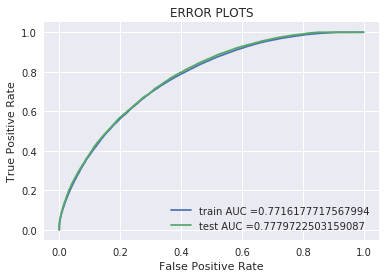

In [264]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve


from xgboost import XGBClassifier


clf2 = XGBClassifier(max_depth = 5, n_estimators = 250, scale_pos_weight = 3.6068300451207644, n_jobs = -1)
#clfV2 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

#vect = DictVectorizer(sparse=False)
#trans = vect.fit_transform(X_te2)

clf2.fit(X_tr, y_train)
#clfV2.fit(X_tr2, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred2 = batch_predict(clf2, X_tr)    
y_test_pred2 = batch_predict(clf2, X_te)

train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(y_train, y_train_pred2)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred2)

plt.plot(train_fpr2, train_tpr2, label="train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr2, test_tpr2, label="test AUC ="+str(auc(test_fpr2, test_tpr2)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [89]:
test_labels = clf2.predict(test_fin)

In [90]:
submission = pd.read_csv('sample_submission_24jSKY6.csv')

In [91]:
submission.head()

UniqueID  loan_default
0    655269             0
1    723482             0
2    758529             0
3    763449             0
4    708663             0

In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 233154 to 345545
Data columns (total 45 columns):
AVERAGE.ACCT.AGE                       112392 non-null object
Aadhar_flag                            112392 non-null int64
CREDIT.HISTORY.LENGTH                  112392 non-null object
Current_pincode_ID                     112392 non-null int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    112392 non-null int64
Date.of.Birth                          112392 non-null object
DisbursalDate                          112392 non-null datetime64[ns]
Driving_flag                           112392 non-null int64
Employee_code_ID                       112392 non-null int64
Employment.Type                        112392 non-null int64
MobileNo_Avl_Flag                      112392 non-null int64
NEW.ACCTS.IN.LAST.SIX.MONTHS           112392 non-null int64
NO.OF_INQUIRIES                        112392 non-null int64
PAN_flag                               112392 non-null int64
PERFORM_CNS.SCORE 

In [93]:
unique_id = project_data_te['UniqueID']

In [94]:
submission = pd.DataFrame({'UniqueID': unique_id,'loan_default': test_labels})

In [95]:
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv


In [96]:
pd.read_csv('submission.csv')

UniqueID  loan_default
0         655269             1
1         723482             1
2         758529             1
3         763449             0
4         708663             1
5         725530             1
6         708592             1
7         714975             1
8         712795             1
9         708656             1
10        712520             0
11        753695             1
12        708646             1
13        730225             1
14        714877             0
15        769166             0
16        710254             1
17        708812             1
18        726172             1
19        716959             1
20        725935             1
21        736039             1
22        748400             1
23        753652             1
24        695108             0
25        695320             0
26        662145             0
27        688068             0
28        662099             0
29        723985             0
...          ...           ...
112362    752805             0
112363    717500             0
112364    724306             0
112365    711416             0
112366    748123             0
112367    693692             0
112368    755025             0
112369    736372             0
112370    742701             0
112371    693666             0
112372    756379             0
112373    684778             0
112374    764397             0
112375    755459             0
112376    703659             0
112377    760921             0
112378    670693             0
112379    741933             0
112380    742851             0
112381    699787             0
112382    669006             0
112383    708464             0
112384    762274             0
112385    767673             0
112386    743207             0
112387    755547             0
112388    716994             0
112389    709352             0
112390    699795             0
112391    755244             0

[112392 rows x 2 columns]

In [173]:
project_data_tr.head()

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  ...    \
0               45                1441      01-01-84        Salaried  ...     
1               45                1502      31-07-85   Self employed  ...     
2               45                1497      24-08-85   Self employed  ...     
3               45                1501      30-12-93   Self employed  ...     
4               45                1495      09-12-77   Self employed  ...     

  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT  \
0                     0                     0                   0   
1                     0                     0                1991   
2                     0                     0                   0   
3                     0                     0                  31   
4                     0                     0                   0   

   SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   
2                                    0         0yrs 0mon   
3                                    0         0yrs 8mon   
4                                    0         0yrs 0mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  label  
0              0yrs 0mon                0      0  
1             1yrs 11mon                0      1  
2              0yrs 0mon                0      0  
3              1yrs 3mon                1      1  
4              0yrs 0mon                1      1  

[5 rows x 41 columns]

In [174]:
project_data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        233154 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



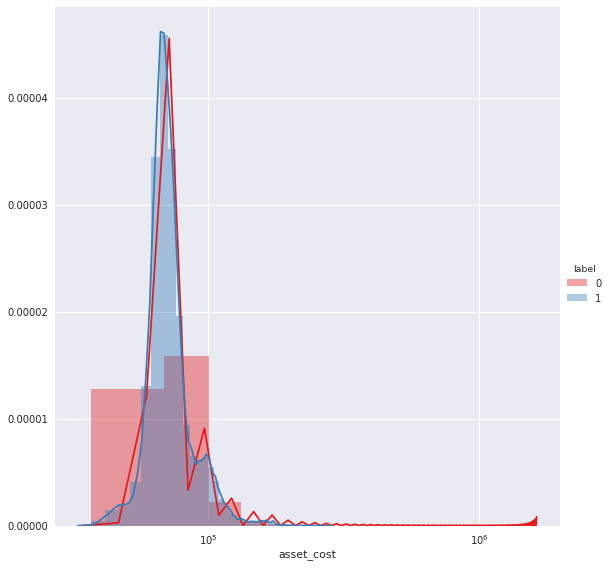

In [214]:
sns.FacetGrid(project_data_tr, hue="label", size=8,  palette="Set1") \
   .map(sns.distplot, "asset_cost") \
   .add_legend();
plt.xscale('log')
plt.show();


/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



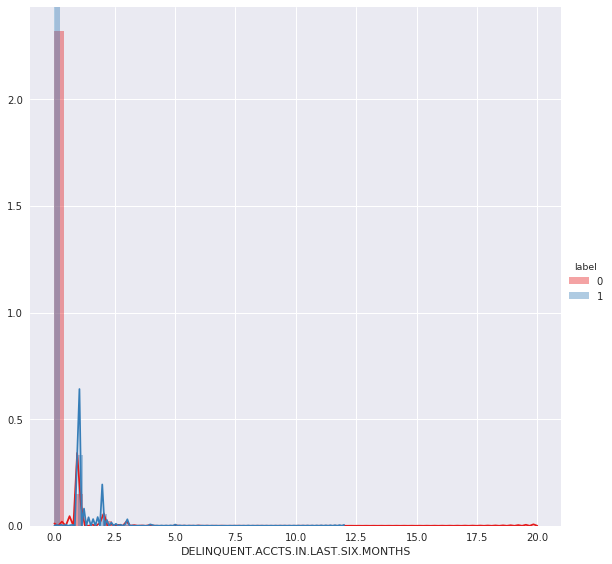

In [129]:
sns.FacetGrid(project_data_tr, hue="label", size=8,  palette="Set1") \
   .map(sns.distplot, "DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS") \
   .add_legend();
#plt.xscale('log')
plt.show();


/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



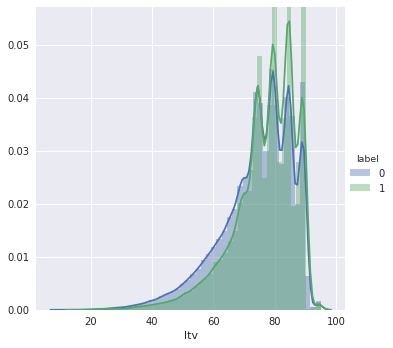

In [198]:
sns.FacetGrid(project_data_tr, hue="label", size=5) \
   .map(sns.distplot, "ltv") \
   .add_legend();
#plt.xscale('log')
plt.show();


/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



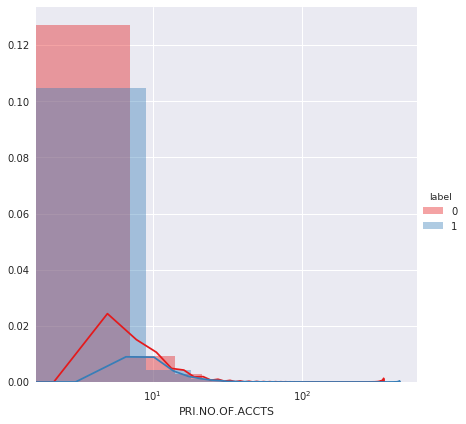

In [131]:
sns.FacetGrid(project_data_tr, hue="label", size=6,  palette="Set1") \
   .map(sns.distplot, "PRI.NO.OF.ACCTS") \
   .add_legend();
plt.xscale('log')
plt.show();

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



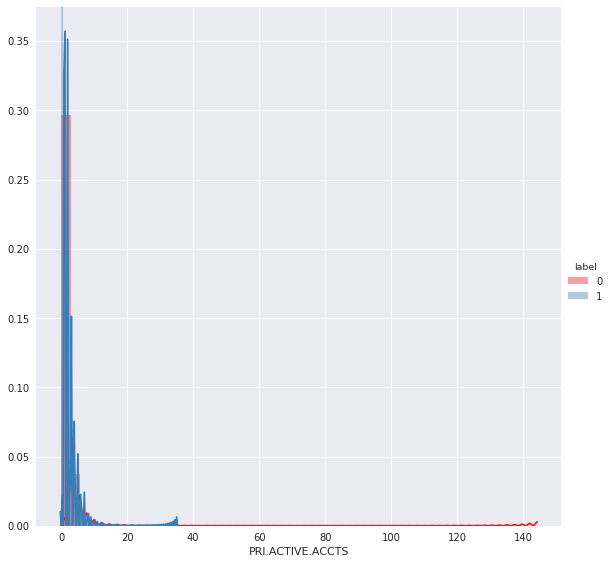

In [205]:
sns.FacetGrid(project_data_tr, hue="label", size=8, palette="Set1") \
   .map(sns.distplot, "PRI.ACTIVE.ACCTS") \
   .add_legend();
#plt.xscale('log')
plt.show();


/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



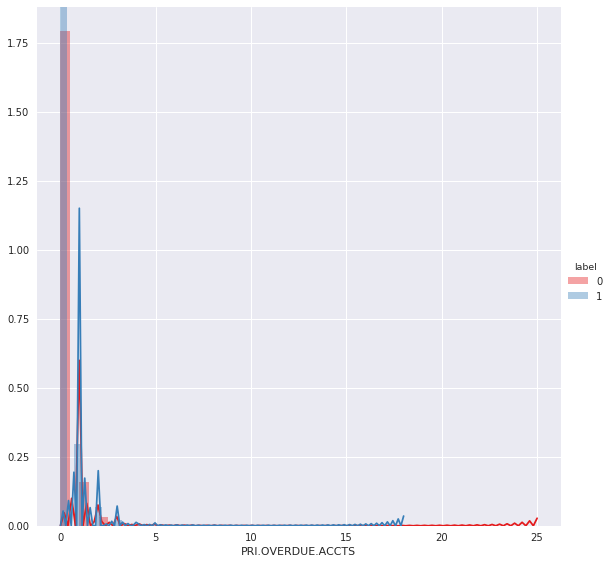

In [211]:
sns.FacetGrid(project_data_tr, hue="label", size=8, palette="Set1") \
   .map(sns.distplot, "PRI.OVERDUE.ACCTS") \
   .add_legend();
#plt.xscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



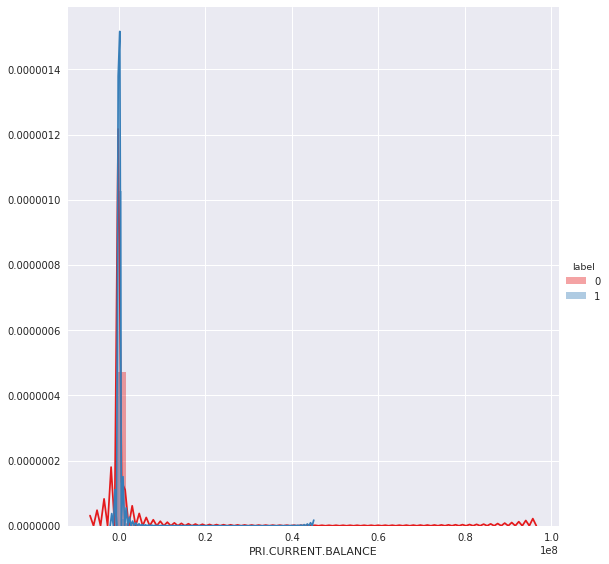

In [215]:
sns.FacetGrid(project_data_tr, hue="label", size=8, palette="Set1") \
   .map(sns.distplot, "PRI.CURRENT.BALANCE") \
   .add_legend();
#plt.xscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



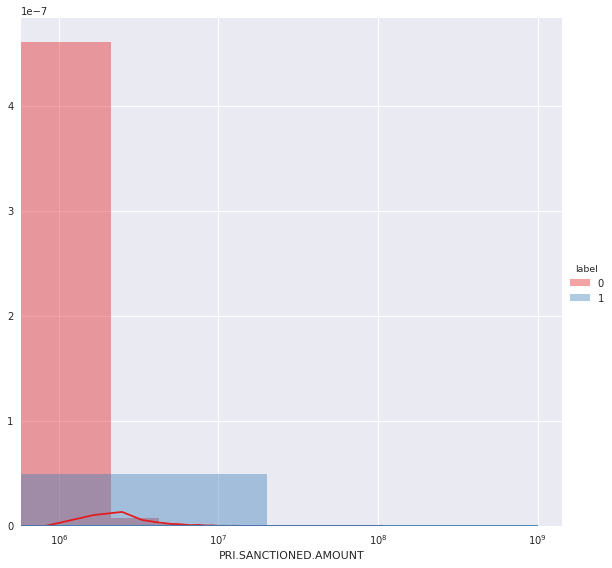

In [223]:
sns.FacetGrid(project_data_tr, hue="label", size=8, palette="Set1") \
   .map(sns.distplot, "PRI.SANCTIONED.AMOUNT") \
   .add_legend();
plt.xscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



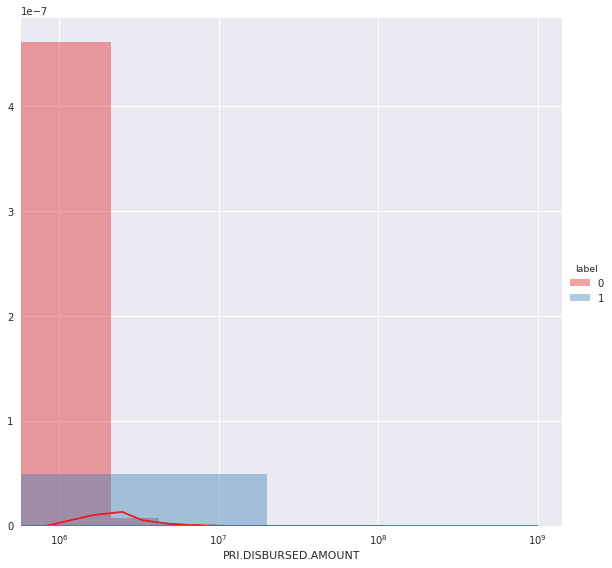

In [222]:
sns.FacetGrid(project_data_tr, hue="label", size=8, palette="Set1") \
   .map(sns.distplot, "PRI.DISBURSED.AMOUNT") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



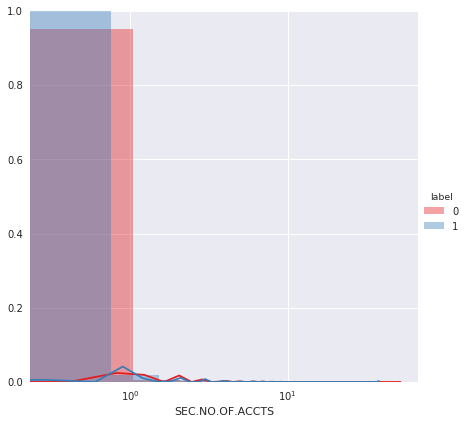

In [225]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.NO.OF.ACCTS") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



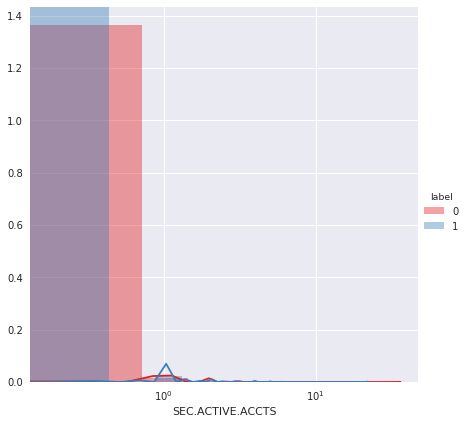

In [226]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.ACTIVE.ACCTS") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



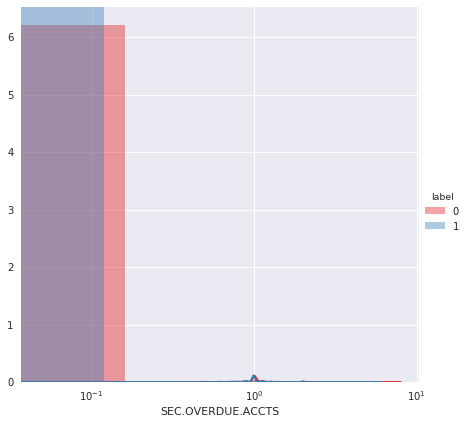

In [227]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.OVERDUE.ACCTS") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



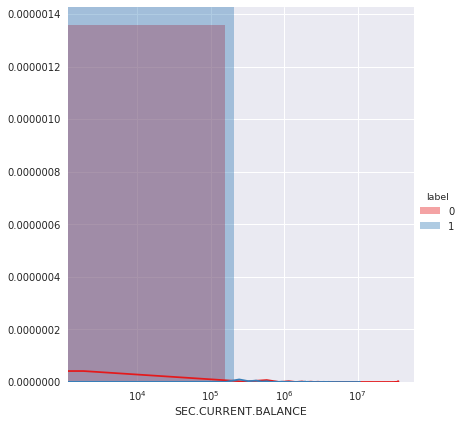

In [228]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.CURRENT.BALANCE") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



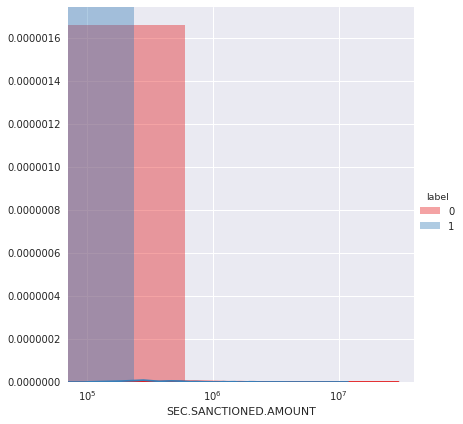

In [229]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.SANCTIONED.AMOUNT") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



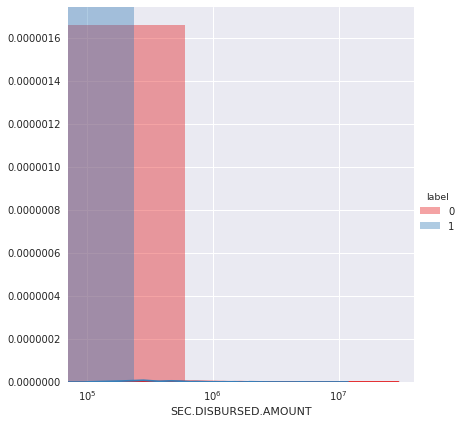

In [230]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.DISBURSED.AMOUNT") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



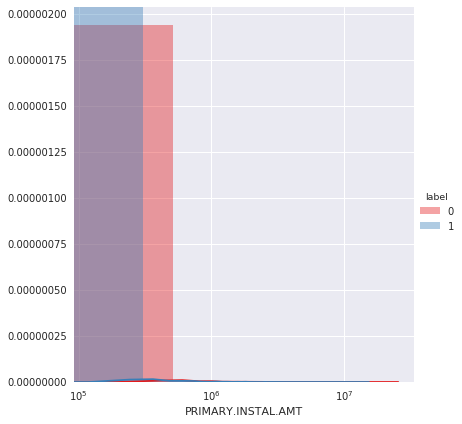

In [232]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "PRIMARY.INSTAL.AMT") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



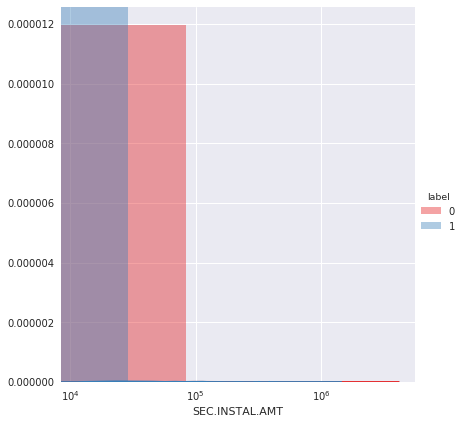

In [233]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "SEC.INSTAL.AMT") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/pritam_sk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



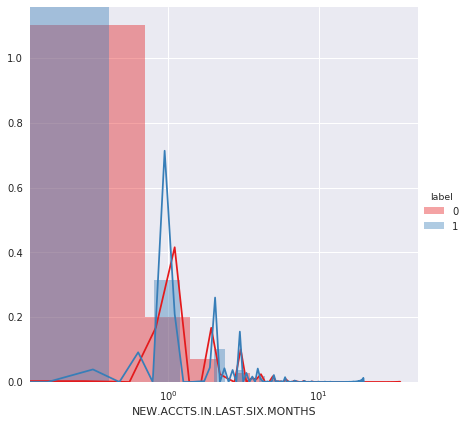

In [234]:
sns.FacetGrid(project_data_tr, hue="label", size=6, palette="Set1") \
   .map(sns.distplot, "NEW.ACCTS.IN.LAST.SIX.MONTHS") \
   .add_legend();
plt.xscale('log')
#plt.yscale('log')
plt.show()

In [248]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

X_tr_RS = rs.fit_transform(X_tr.todense())
X_te_RS = rs.transform(X_te.todense())

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_tr_SC = sc.fit_transform(X_tr.todense())
X_te_SC = sc.transform(X_te.todense())

In [ ]:
SEC.NO.OF.ACCTS                        233154 non-null int64
SEC.ACTIVE.ACCTS                       233154 non-null int64
SEC.OVERDUE.ACCTS                      233154 non-null int64
SEC.CURRENT.BALANCE                    233154 non-null int64
SEC.SANCTIONED.AMOUNT                  233154 non-null int64
SEC.DISBURSED.AMOUNT                   233154 non-null int64
PRIMARY.INSTAL.AMT                     233154 non-null int64
SEC.INSTAL.AMT                         233154 non-null int64
NEW.ACCTS.IN.LAST.SIX.MONTHS 